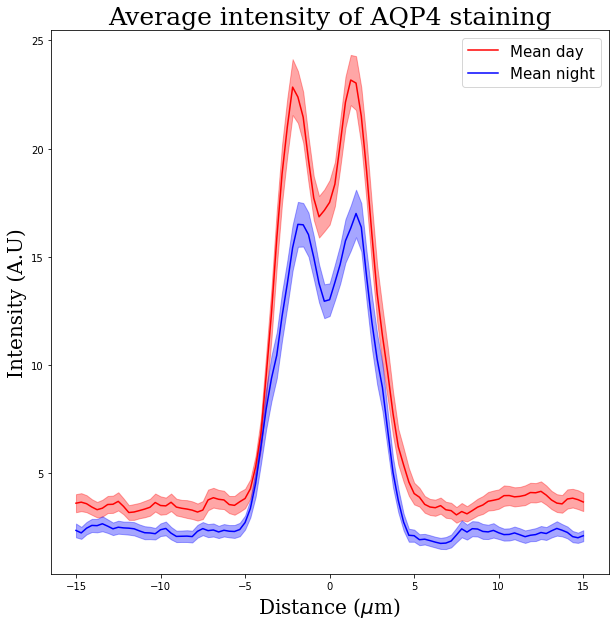

In [10]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import fsolve
from scipy import stats

# Import data
fig3b_day = pd.read_csv('fig3b_day.csv', sep='\t', header=None)
fig3b_night = pd.read_csv('fig3b_night.csv', sep='\t', header=None)

# Mean
fig3b_day['Mean'] = fig3b_day.iloc[:,1:].mean(axis=1) 
fig3b_night['Mean'] = fig3b_night.mean(axis=1)

# Return unbiased standard error of the mean 
fig3b_day['SEM'] = fig3b_day.iloc[:,1:-1].sem(axis=1) 
fig3b_night['SEM'] = fig3b_night.iloc[:,:-1].sem(axis=1)

plt.figure()
# Font
plt.rcParams["figure.figsize"] = (10,10)
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 20,
    }

# Plot

#fig3b_day.plot(x=0, y=np.arange(1, len(fig3b_day.columns), 20).tolist())
plt.plot(fig3b_day[0], fig3b_day['Mean'], 'r', label='Mean day')
plt.plot(fig3b_day[0],fig3b_night['Mean'], 'b', label='Mean night')

# Shade the SEM
plt.fill_between(fig3b_day[0], fig3b_day['Mean'] - fig3b_day['SEM'], fig3b_day['Mean'] + fig3b_day['SEM'], color='r', alpha=0.35)
plt.fill_between(fig3b_day[0], fig3b_night['Mean'] - fig3b_night['SEM'], fig3b_night['Mean'] + fig3b_night['SEM'], color='b', alpha=0.35)

# Labels
plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)
plt.ylabel('Intensity (A.U)', fontdict=font, labelpad=None)
plt.title('Average intensity of AQP4 staining', fontdict=font, fontsize=25)
plt.legend(fontsize=15)

plt.savefig('fig3b.svg')
plt.show()
#plt.close()

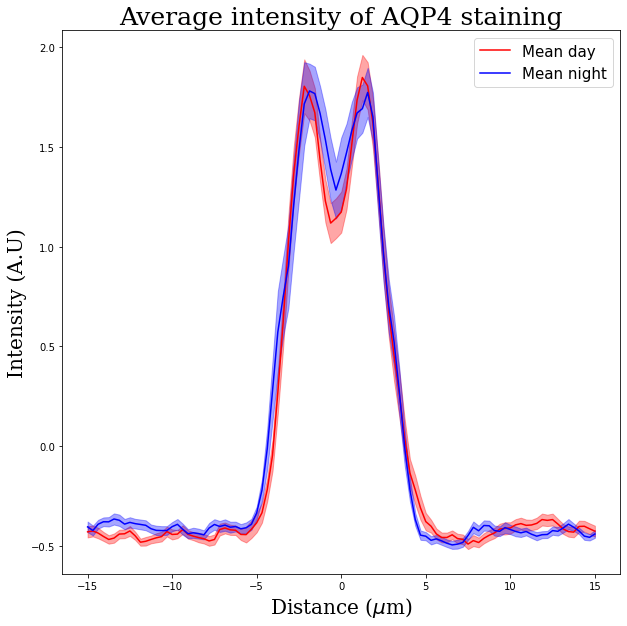

In [11]:
def standard_score(col):
	return ( col - np.mean(col) ) / np.std(col)

fig3b_day.iloc[:,1:] = fig3b_day.iloc[:,1:].apply(standard_score)
fig3b_night.iloc[:,1:] = fig3b_night.iloc[:,1:].apply(standard_score)

# Mean
fig3b_day['Mean'] = fig3b_day.iloc[:,1:].mean(axis=1) 
fig3b_night['Mean'] = fig3b_night.mean(axis=1)

# Return unbiased standard error of the mean 
fig3b_day['SEM'] = fig3b_day.iloc[:,1:-1].sem(axis=1) 
fig3b_night['SEM'] = fig3b_night.iloc[:,:-1].sem(axis=1)

plt.figure()
# Font
plt.rcParams["figure.figsize"] = (10,10)
font = {'family': 'serif',
    'color':  'black',
    'weight': 'normal',
    'size': 20,
    }

# Plot

#fig3b_day.plot(x=0, y=np.arange(1, len(fig3b_day.columns), 20).tolist())
plt.plot(fig3b_day[0], fig3b_day['Mean'], 'r', label='Mean day')
plt.plot(fig3b_day[0],fig3b_night['Mean'], 'b', label='Mean night')

# Shade the SEM
plt.fill_between(fig3b_day[0], fig3b_day['Mean'] - fig3b_day['SEM'], fig3b_day['Mean'] + fig3b_day['SEM'], color='r', alpha=0.35)
plt.fill_between(fig3b_day[0], fig3b_night['Mean'] - fig3b_night['SEM'], fig3b_night['Mean'] + fig3b_night['SEM'], color='b', alpha=0.35)

# Labels
plt.xlabel('Distance ($\mu$m)', fontdict=font, labelpad=None)
plt.ylabel('Intensity (A.U)', fontdict=font, labelpad=None)
plt.title('Average intensity of AQP4 staining', fontdict=font, fontsize=25)
plt.legend(fontsize=15)

plt.savefig('fig3b_STD_SCORE.svg')
plt.show()
#plt.close()